In [7]:
import seaborn as sns
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier

In [8]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='species', ylabel='Proportion'>

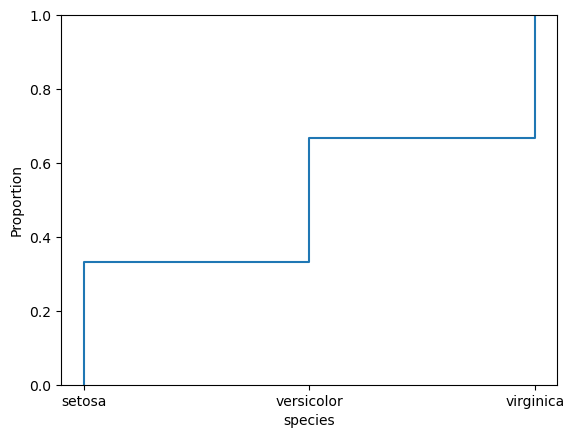

In [10]:
sns.ecdfplot(df["species"])